In [1]:
# %matplotlib widget
# import ipywidgets as widgets
import os 
import math
from os import listdir
from os.path import isfile, join
import openpyxl
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# fname = r'Y:\mosaic\data\processed\atmos\tower\level2v2\mosseb_level2v2_2m_1h.xlsx'
# df_atmos = pd.read_excel(fname, 'Sheet1')
# df_atmos = df_atmos[df_atmos['DateTime (UTC)'] > '2020-01-01'] 
# df_atmos = df_atmos[df_atmos['DateTime (UTC)'] < '2020-05-15']

fnameT = 'Y:\mosaic\data\metadata\Final\metadata_Temperature.xlsx'
temp_df = pd.read_excel(fnameT,'MOSAiC_ICE_Temperature')


temp_df['AtSnowHeight cm']=temp_df['AtSnowHeight cm'].astype(float)
temp_df=temp_df.dropna(subset=['AtSnowHeight cm', 'Temperature degC', 'Timestamp'])
temp_df = temp_df[temp_df['Timestamp'] > '2019-10-01'] 
temp_df = temp_df[temp_df['Timestamp'] < '2020-05-15']

unique_device_ids = pd.unique(temp_df['Event'])


list_time=[]
for udi in unique_device_ids:
        temp_df2=temp_df[temp_df['Event']== udi]
        ts = temp_df2['Timestamp'].apply(lambda x: x.strftime('%Y-%m-%d')).iloc[0]
        list_time.append(ts)

print(len(unique_device_ids))

173


173 173 0


C:\Users\amyrm\AppData\Local\Temp\ipykernel_10224\1060637407.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  temp_grad = temp_diff/(h_s)
C:\Users\amyrm\AppData\Local\Temp\ipykernel_10224\1060637407.py:21: RuntimeWarning: invalid value encountered in scalar divide
  temp_grad = temp_diff/(h_s)
C:\Users\amyrm\AppData\Local\Temp\ipykernel_10224\1060637407.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([list_time[0], list_time[l], list_time[l*2], list_time[l*3], list_time[l*4], list_time[l*5]])


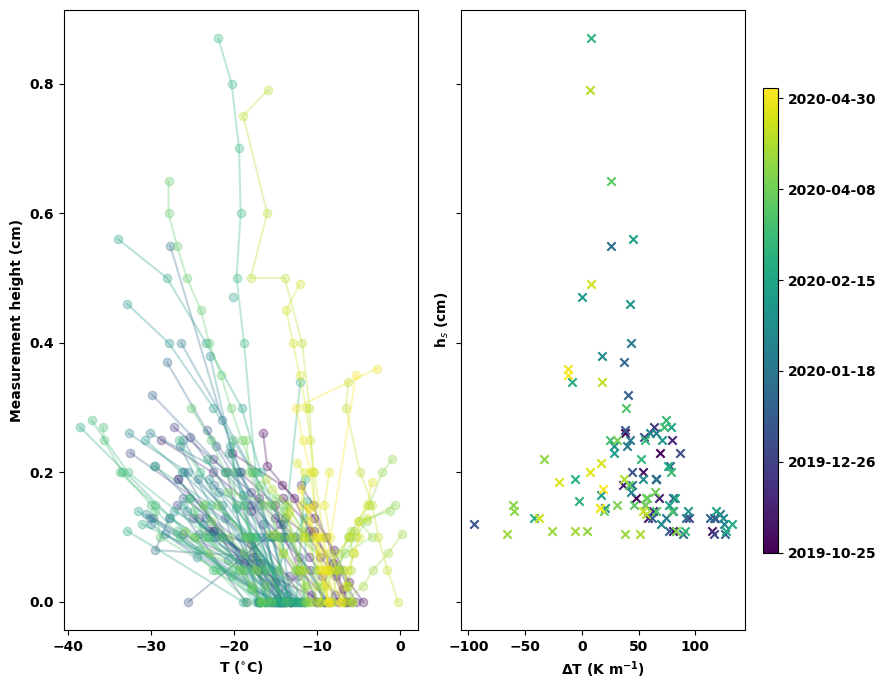

In [3]:
fig, ax = plt.subplots(1,2, figsize=(9,7), sharey=True)#, dpi=300)
list_temp=[]
i=0

cmap = plt.get_cmap('viridis')
indices = np.linspace(0, cmap.N, len(unique_device_ids))
my_colors = [cmap(int(i)) for i in indices]
norm = plt.Normalize(round(indices.min()), round(indices.max()))


print(len(list_time), len(my_colors), i)

for udi in unique_device_ids:
        temp_df2=temp_df[temp_df['Event']== udi]
        temp_df2=temp_df2.sort_values(by=['AtSnowHeight cm'], ascending=False)
        temp_df2['Timestamp'] = temp_df2['Timestamp'].astype('datetime64[ns]')
            
        h_s = temp_df2['AtSnowHeight cm'].iloc[0] / 100
        t_a, t_si = temp_df2['Temperature degC'].iloc[0]+ 273.15, temp_df2['Temperature degC'].iloc[-1]+ 273.15
        temp_diff = t_si-t_a
        temp_grad = temp_diff/(h_s)
        if h_s > .1: # and temp_diff > .1:
            im = ax[0].plot( temp_df2['Temperature degC'],temp_df2['AtSnowHeight cm']/100, marker='o', alpha=0.3, color=my_colors[i])
            list_temp.append(temp_grad)
            ax[1].scatter(temp_grad, h_s, color=my_colors[i], marker='x', label ='')#,s=8)
            i=i+1
        else:
            i=i+1
            continue

ax[0].set_ylabel('Measurement height (cm)')
ax[1].set_xlabel('$\Delta$T (K m$^{-1}$)')
ax[0].set_xlabel('T ($^{\circ}$C)')
ax[1].set_ylabel('h$_s$ (cm)')


cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm),
             orientation='vertical',
             ax=ax[1],
             shrink=0.75,
             aspect=30)

l =int(len(list_time)/5)
cbar.ax.set_yticklabels([list_time[0], list_time[l], list_time[l*2], list_time[l*3], list_time[l*4], list_time[l*5]])

plt.tight_layout()

plt.savefig(r'temperature_snowpits.png', transparent=True, bbox_inches='tight')

C:\Users\amyrm\AppData\Local\Temp\ipykernel_10224\3709870795.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  temp_grad = temp_diff/(h_s)
C:\Users\amyrm\AppData\Local\Temp\ipykernel_10224\3709870795.py:19: RuntimeWarning: invalid value encountered in scalar divide
  temp_grad = temp_diff/(h_s)
C:\Users\amyrm\AppData\Local\Temp\ipykernel_10224\3709870795.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([list_time[0], list_time[l], list_time[l*2], list_time[l*3], list_time[l*4], list_time[l*5]])


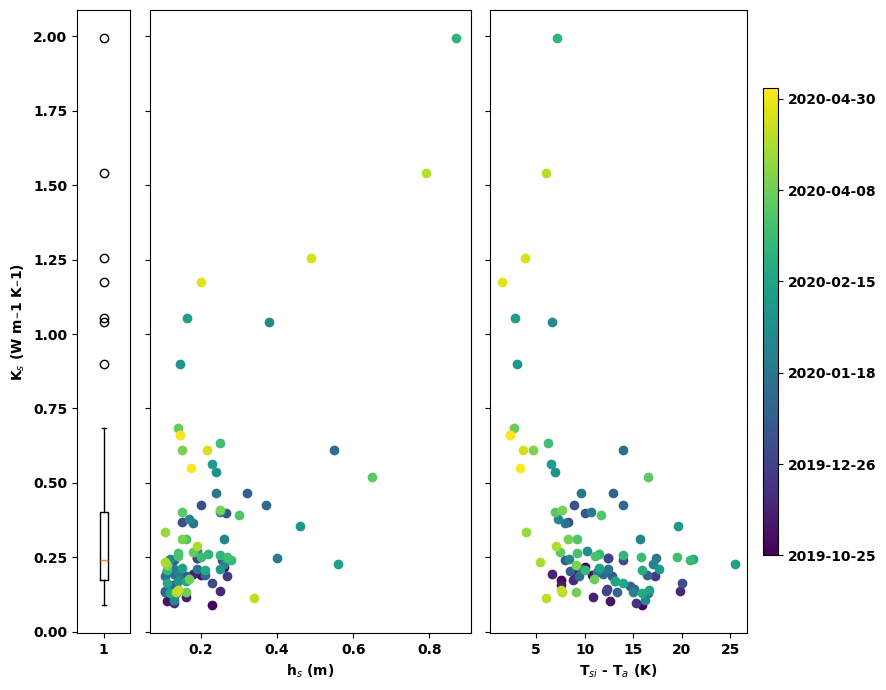

In [4]:

fig, ax = plt.subplots(1,3, figsize=(9,7), sharey=True, width_ratios=[.5, 3,3])#, dpi=300) 

i= 0
list_ks = []
unique_device_ids_new= []

k_i = 2. # W m–1 K–1,  https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2005JC002990
h_i = 2 # approximate 2m of ice??
t_w = 274.95 # 1.8 degC

for udi in unique_device_ids:
        temp_df2=temp_df[temp_df['Event']== udi]
        temp_df2=temp_df2.sort_values(by=['AtSnowHeight cm'], ascending=False)
        temp_df2['Timestamp'] = temp_df2['Timestamp'].astype('datetime64[ns]')
            
        h_s = temp_df2['AtSnowHeight cm'].iloc[0] / 100
        t_a, t_si = temp_df2['Temperature degC'].iloc[0]+ 273.15, temp_df2['Temperature degC'].iloc[-1]+ 273.15
        temp_diff = t_si - t_a
        temp_grad = temp_diff/(h_s)
        if temp_diff > 1 and h_s > .1:
            k_s = k_i * ((t_si - t_w)/ h_i ) * (h_s /(t_a - t_si))
            list_ks.append(k_s)
            unique_device_ids_new.append(udi)
            ax[1].scatter(h_s, k_s,   color=my_colors[i])
            ax[2].scatter(temp_diff, k_s,    color=my_colors[i])
            i=i+1
        else:
            i=i+1
            continue



# plt.plot([0,1],[0,1], 'k--')
# plt.ylim(0,.5)
ax[0].set_ylabel('K$_s$ (W m–1 K–1)')
ax[1].set_xlabel('h$_s$ (m)')
# ax[2].set_ylabel('K$_s$ (W m–1 K–1)')
ax[2].set_xlabel('T$_{si}$ - T$_a$ (K)')

ax[0].boxplot(list_ks)#, vert=False)
# ax[0].set_ylim(0,0.5)

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm),
             orientation='vertical',
             ax=ax[2],
             shrink=0.75,
             aspect=30)
l =int(len(list_time)/5)
cbar.ax.set_yticklabels([list_time[0], list_time[l], list_time[l*2], list_time[l*3], list_time[l*4], list_time[l*5]])

plt.tight_layout()
plt.savefig(r'3_point_calc.png', transparent=True, bbox_inches='tight')

conditions:
* temp_diff (t_si-t_a) > 1 K
* h_s > .1 m

add t_a - t_si > 7 K ???

100 100


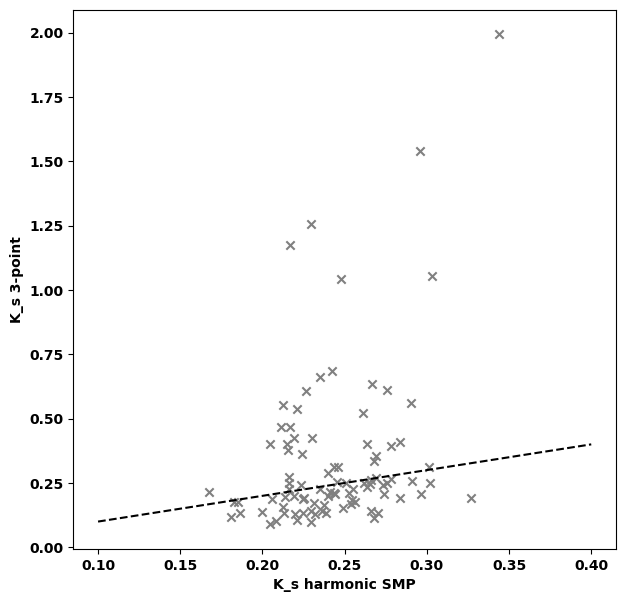

In [5]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

print(len(list_ks), len(unique_device_ids_new))
df = pd.DataFrame(
    {'EventID': unique_device_ids_new, 'ks_3p': list_ks})


smp_df = pd.read_excel('Harmonic_ThermCon_output.xlsx','Sheet1')

for index,row in df.iterrows(): 
    smp_event = smp_df[smp_df['event'] == row['EventID']]
    # print(k_s_avg)
    k_s_avg = smp_event['K_harmonic'].mean()
    ax.scatter(k_s_avg, row['ks_3p'], marker = 'x', color = 'grey')

ax.plot([.1,.4],[.1,.4], 'k--')
ax.set_xlabel('K_s harmonic SMP')
ax.set_ylabel('K_s 3-point')
plt.savefig(r'3point_vs_smp.png', transparent=True, bbox_inches='tight')

In [6]:
print(len(unique_device_ids_new))

print(len(list_ks))

df_for_anne = pd.DataFrame(
    {'EventIDs': unique_device_ids_new,
     'Ksnow': list_ks})

df_for_anne.to_csv('3-point-snowpits.csv', index=False)

100
100
